# Binomial sum variance inequality

[https://en.wikipedia.org/wiki/Binomial_sum_variance_inequality](https://en.wikipedia.org/wiki/Binomial_sum_variance_inequality)

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def simulate_binomial_sum_variance(
    beta_mu: float,
    beta_sd: float,
    n_trials: int,
    n_binomials: int,
    n_experiments: int,
):
    # Draw binomial distribution parameters from beta distribution
    v = beta_mu * (1 - beta_mu) / beta_sd**2 - 1
    a = beta_mu * v
    b = (1 - beta_mu) * v
    p_binomials = np.random.beta(a, b, n_binomials)
    p_avg = np.mean(p_binomials)

    # Draw sum of binomials samples
    sum_binomial_samples = np.zeros(n_experiments)
    for idx, p in enumerate(p_binomials):
        sum_binomial_samples += np.random.binomial(n=n_trials, p=p, size=n_experiments)

    # Draw binomial samples
    binomial_samples = np.random.binomial(
        n=n_trials * n_binomials, p=p_avg, size=n_experiments
    )

    return (
        np.var(sum_binomial_samples),
        np.var(binomial_samples),
        sum_binomial_samples,
        binomial_samples,
    )

## Binomial vs Sum of binomials - Example distributions

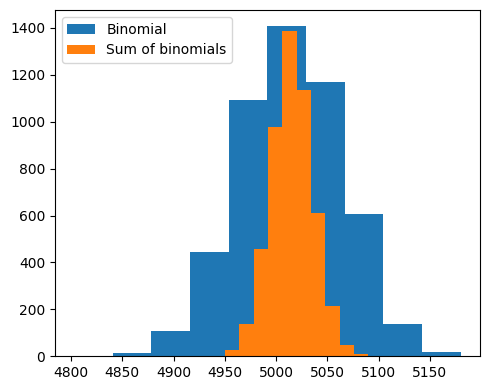

In [3]:
_, _, sum_binomial_samples, binomial_samples = simulate_binomial_sum_variance(
    beta_mu = .5,
    beta_sd = .45,
    n_trials = 100,
    n_binomials = 100,
    n_experiments = 5000,
)

fig, ax = plt.subplots(1, 1, figsize = (5, 4))
ax.hist(binomial_samples, label="Binomial")
ax.hist(sum_binomial_samples, label="Sum of binomials")
ax.legend()
plt.tight_layout()
plt.show()

## Sum of binomials variance as function of underlying p variance

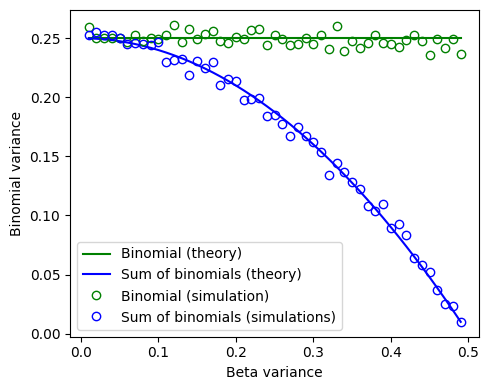

In [41]:
beta_mu = 0.5
beta_sd_vec = np.arange(0.01, 0.5, 0.01)

binomial_variance = beta_mu * (1 - beta_mu) * np.ones(beta_sd_vec.shape)
sum_binomial_variance = binomial_variance - beta_sd_vec**2

n_trials = 100
n_binomials = 100
binomial_variance_sim = np.zeros(beta_sd_vec.shape)
sum_binomial_variance_sim = np.zeros(beta_sd_vec.shape)
for idx, beta_sd in enumerate(beta_sd_vec):
    sum_var, var, _, _ = simulate_binomial_sum_variance(
        beta_mu=beta_mu,
        beta_sd=beta_sd,
        n_trials=n_trials,
        n_binomials=n_binomials,
        n_experiments=5000,
    )
    sum_binomial_variance_sim[idx] = sum_var / (n_trials * n_binomials)
    binomial_variance_sim[idx] = var / (n_trials * n_binomials)

fig, ax = plt.subplots(1, 1, figsize = (5, 4))
ax.plot(beta_sd_vec, binomial_variance, "g", label="Binomial (theory)")
ax.plot(beta_sd_vec, sum_binomial_variance, "b", label="Sum of binomials (theory)")
ax.plot(beta_sd_vec, binomial_variance_sim, "go", markerfacecolor='none', label="Binomial (simulation)")
ax.plot(beta_sd_vec, sum_binomial_variance_sim, "bo", markerfacecolor='none', label="Sum of binomials (simulations)")
ax.set_xlabel("Beta variance")
ax.set_ylabel("Binomial variance")
plt.legend()
plt.tight_layout()
plt.show()